In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [13]:
m = pd.read_csv('../datasets/mushrooms.csv')

In [14]:
m.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
m.columns

Index([u'class', u'cap-shape', u'cap-surface', u'cap-color', u'bruises',
       u'odor', u'gill-attachment', u'gill-spacing', u'gill-size',
       u'gill-color', u'stalk-shape', u'stalk-root',
       u'stalk-surface-above-ring', u'stalk-surface-below-ring',
       u'stalk-color-above-ring', u'stalk-color-below-ring', u'veil-type',
       u'veil-color', u'ring-number', u'ring-type', u'spore-print-color',
       u'population', u'habitat'],
      dtype='object')

In [16]:
m.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [17]:
m.shape

(8124, 23)

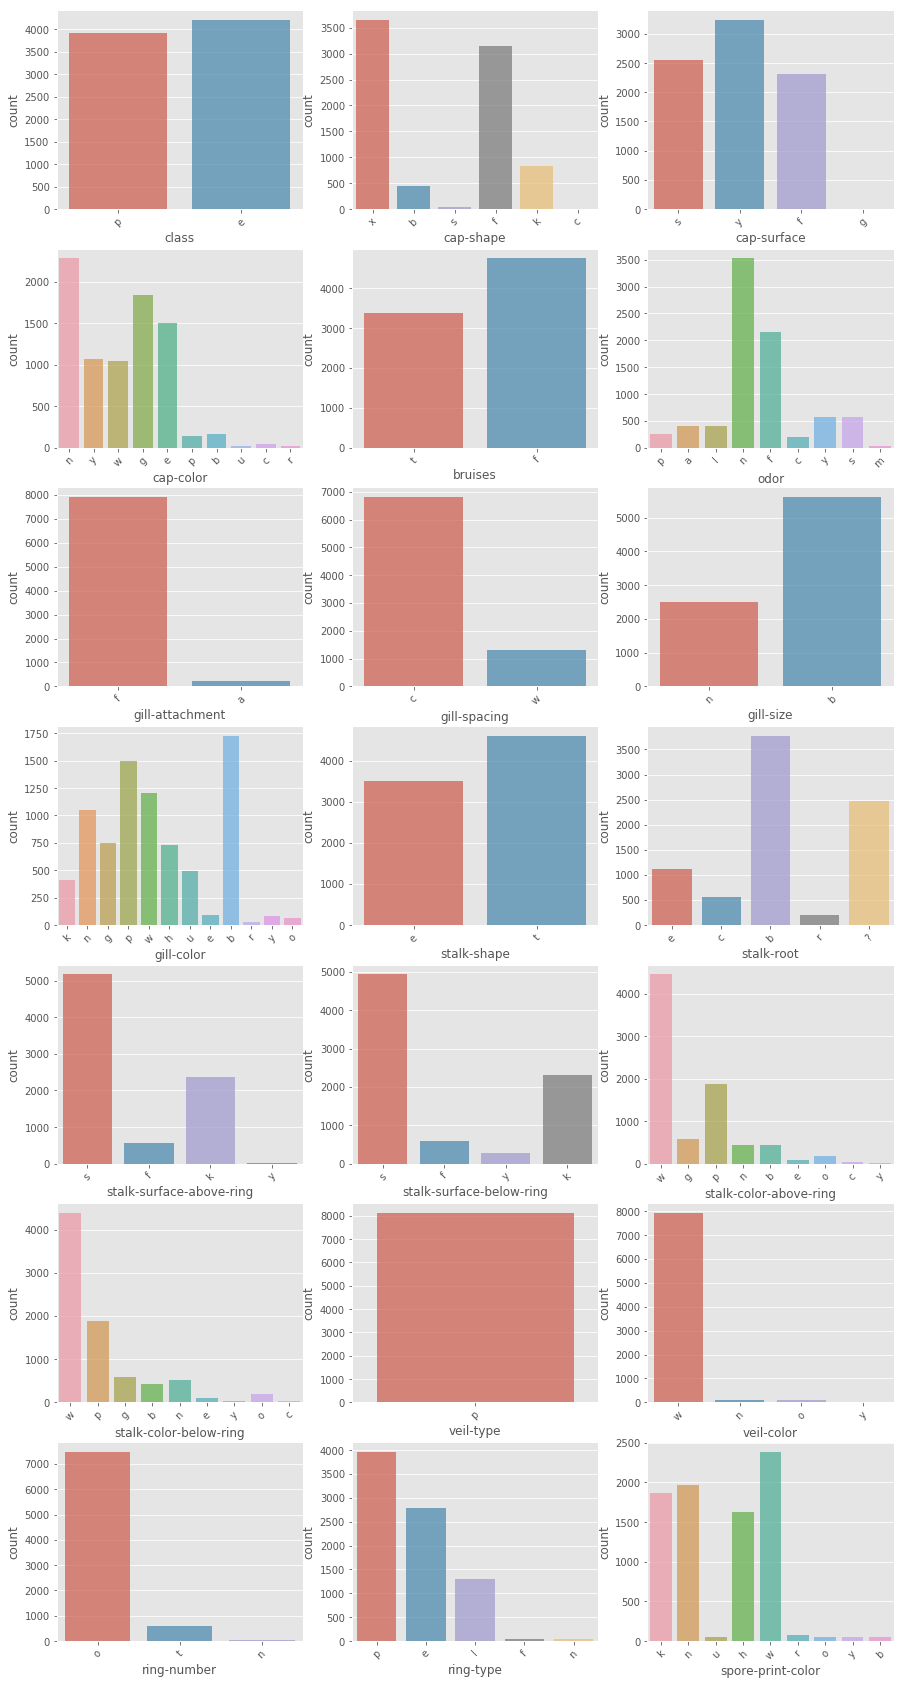

In [41]:
fig, axes = plt.subplots(nrows=int(round(len(m.columns) / 3)), ncols=3, figsize=(15,30))
for i, ax in enumerate(fig.axes):
    if i < len(m.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=m.columns[i], alpha=0.7, data=m, ax=ax)

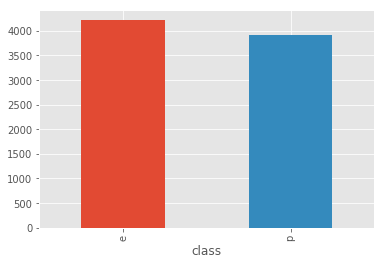

In [23]:
m.groupby('class')['class'].count().plot.bar()

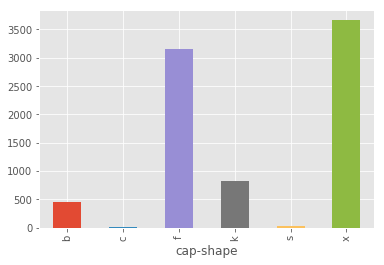

In [24]:
m.groupby('cap-shape')['cap-shape'].count().plot.bar()

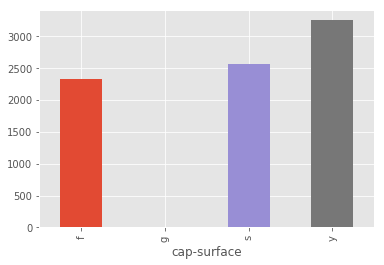

In [26]:
m.groupby('cap-surface')['cap-surface'].count().plot.bar()

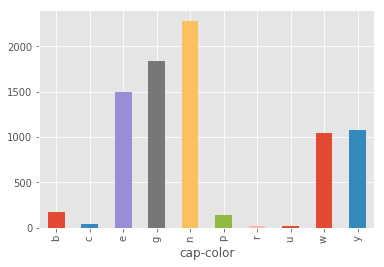

In [27]:
m.groupby('cap-color')['cap-color'].count().plot.bar()

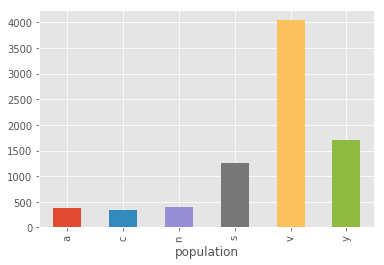

In [22]:
m.groupby('population')['population'].count().plot.bar()

In [12]:
md = pd.get_dummies(m)